In [20]:
import numpy as np 

# 特殊函数：阶乘（factorial）、连带拉盖尔多项式（genlaguerre）、球谐函数（sph_harm） 
from scipy.special import factorial, genlaguerre, sph_harm 

# 等值面搜索：marching_cubes 
from skimage.measure import marching_cubes 

# 绘图组件 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d.art3d import Poly3DCollection 

# Jupyter Notebook内嵌绘图用，本地运行则不写这一行 
# %matplotlib notebook
%matplotlib inline 

In [21]:
# 定义约化玻尔半径a0, 原子单位下直接设置为1 
a0 = 1 

def hydrogen_wave_function(n, l, m): 
    # 径向部分R(r), 注意genlaguerre的参数顺序 
    def R(r): 
        factor = np.sqrt((2. / (n * a0))**3 * 
                         factorial(n - l - 1) / (2 * n * factorial(n + l)))                     # 系数 
        rho = 2 * r / (n * a0)                                                                  # 中间量rho 
        return factor * (rho**l) * np.exp(-rho / 2) * genlaguerre(n - l - 1, 2 * l + 1)(rho) 

    # 角向部分Y(theta, phi)就是球谐函数sph_harm 
    # 注意量子数l与m 和 自变量theta与phi的顺序都是颠倒的！ 
    def Y(theta, phi): 
        return sph_harm(m, l, phi, theta)

    # 径向部分R(r)和角向部分Y(theta, phi)相乘，得到一个关于(r, theta, phi)的函数，即原子轨道 
    return lambda r, theta, phi: R(r) * Y(theta, phi)

In [22]:
# 原子轨道参数，当前为2p0轨道 
n, l, m = 2, 1, 0 

# 2p0轨道波函数 
psi = hydrogen_wave_function(n, l, m) 

# `psi`本身是一个函数，后面还可以继续带参数(r, theta, phi)来计算实际的波函数值 
print(f"{psi = }") 
print(f"{psi(1, np.pi/4, np.pi/3) = }") # 注意结果是复数

psi = <function hydrogen_wave_function.<locals>.<lambda> at 0x7fbf12d2e040>
psi(1, np.pi/4, np.pi/3) = (0.04277478503902706+0j)


In [23]:
# limit: 确定网格点的区间范围 
limit = 10 

# n_points: 每个方向上均匀取点的数目 
n_points = 50 

# vec: 临时变量, 从 -limit 到 limit 均匀取 n_points 个点得到的向量 
vec = np.linspace(-limit, limit, n_points) 

print(f"{vec = }") 
print(f"{len(vec) = }")

vec = array([-10.        ,  -9.59183673,  -9.18367347,  -8.7755102 ,
        -8.36734694,  -7.95918367,  -7.55102041,  -7.14285714,
        -6.73469388,  -6.32653061,  -5.91836735,  -5.51020408,
        -5.10204082,  -4.69387755,  -4.28571429,  -3.87755102,
        -3.46938776,  -3.06122449,  -2.65306122,  -2.24489796,
        -1.83673469,  -1.42857143,  -1.02040816,  -0.6122449 ,
        -0.20408163,   0.20408163,   0.6122449 ,   1.02040816,
         1.42857143,   1.83673469,   2.24489796,   2.65306122,
         3.06122449,   3.46938776,   3.87755102,   4.28571429,
         4.69387755,   5.10204082,   5.51020408,   5.91836735,
         6.32653061,   6.73469388,   7.14285714,   7.55102041,
         7.95918367,   8.36734694,   8.7755102 ,   9.18367347,
         9.59183673,  10.        ])
len(vec) = 50


In [24]:
# 生成三维网格 
# X记录每个点的x坐标，Y记录y坐标, Z记录z坐标 
X, Y, Z = np.meshgrid(vec, vec, vec) 

print(f"{X.shape = }", f"{Y.shape = }", f"{Z.shape = }")

X.shape = (50, 50, 50) Y.shape = (50, 50, 50) Z.shape = (50, 50, 50)


In [25]:
# 查看每个点的直角坐标(x, y, z) 
# 后续并不使用`coord_xyz`，只用来确认数据 
coords_xyz = np.vstack(list(map(np.ravel, (X, Y, Z)))).T 

print(f"{len(coords_xyz) = }") 
print(coords_xyz)

len(coords_xyz) = 125000
[[-10.         -10.         -10.        ]
 [-10.         -10.          -9.59183673]
 [-10.         -10.          -9.18367347]
 ...
 [ 10.          10.           9.18367347]
 [ 10.          10.           9.59183673]
 [ 10.          10.          10.        ]]


In [26]:
# 由坐标变换，每个格点从直角坐标系下的(X, Y, Z)变成球坐标系下的（R, THETA, PHI） 
R = np.sqrt(X**2 + Y**2 + Z**2) 
THETA = np.arccos(Z / R) 
PHI = np.arctan2(Y, X) 

print(f"{R.shape = }", f"{THETA.shape = }", f"{PHI.shape = }")

R.shape = (50, 50, 50) THETA.shape = (50, 50, 50) PHI.shape = (50, 50, 50)


In [27]:
# 查看每个点的球坐标(r, theta, phi) # 后续并不使用`coord_rtf`，只用来确认数据 
coords_rtf = np.vstack(list(map(np.ravel, (R, THETA, PHI)))).T 

print(f"{len(coords_rtf) = }") 
print(coords_rtf)

len(coords_rtf) = 125000
[[17.32050808  2.18627604 -2.35619449]
 [17.08810498  2.16677211 -2.35619449]
 [16.86237997  2.14673823 -2.35619449]
 ...
 [16.86237997  0.99485442  0.78539816]
 [17.08810498  0.97482054  0.78539816]
 [17.32050808  0.95531662  0.78539816]]


In [28]:
# 代入波函数`psi`中, 得到每个格点的波函数值 
psi_values = psi(R, THETA, PHI) 

print(f"{psi_values.shape = }") 
print(f"{psi_values[0][0][0] = }") # 直角坐标系下(-10, -10, -10)处的波函数值

psi_values.shape = (50, 50, 50)
psi_values[0][0][0] = (-0.0001728819028298787+0j)


In [29]:
# prob_dens: 概率密度|Psi|^2 
prob_dens = np.abs(psi_values)**2

In [30]:
# iso_value: 目标值，也就是上面的常数C 
iso_value = 4e-4 

# 初次尝试 
verts, faces, _, _ = marching_cubes( prob_dens, level=iso_value, ) 

print(f"{verts = }") 
print(f"{faces = }")

verts = array([[13.979592, 21.      , 16.      ],
       [14.      , 21.      , 15.840323],
       [14.      , 20.949831, 16.      ],
       ...,
       [35.204258, 27.      , 34.      ],
       [35.02041 , 28.      , 16.      ],
       [35.02041 , 28.      , 33.      ]], dtype=float32)
faces = array([[   2,    1,    0],
       [   0,    3,    2],
       [   6,    5,    4],
       ...,
       [3830, 3902, 3813],
       [3903, 3836, 3822],
       [3836, 3903, 3825]], dtype=int32)


In [31]:
# 计算步长step: [-limit, limit]区间被分成(n_points-1)份，每段的长度就是step 
step = 2 * limit / (n_points - 1) 

# 把step传入marching_cubes的spacing参数中 
verts, faces, _, _ = marching_cubes(
                                    prob_dens, 
                                    level=iso_value, 
                                    spacing=(step, step, step), 
                                    ) 

# 将结果平移至原点 
verts -= limit 

# 最后互换x坐标和y坐标 
verts[:, [0, 1]] = verts[:, [1, 0]] 

# 结果确认 
print(f"{verts = }")

verts = array([[-1.42857143, -4.29404395, -3.46938776],
       [-1.42857143, -4.28571429, -3.53456186],
       [-1.44904857, -4.28571429, -3.46938776],
       ...,
       [ 1.02040816,  4.36908488,  3.87755102],
       [ 1.42857143,  4.29404434, -3.46938776],
       [ 1.42857143,  4.29404434,  3.46938776]])


In [32]:
# 辅助函数，每次返回一个调整好的画布`fig`和内框`ax`
def new_fig_and_ax(plot_range=10): 
    fig = plt.figure() 
    ax = fig.add_subplot(1, 1, 1, projection="3d") 
    
    # 设置坐标比例关系，让图像变得方正 
    ax.set_box_aspect([1, 1, 1]) 
    
    # 设置合适的视图俯仰角和方位角，让坐标轴方向符合直观 
    # x轴对着屏幕外方向，y轴朝右，z轴朝上 
    ax.view_init(elev=30, azim=20) 
    
    # 设置坐标轴标签 
    ax.set_xlabel("$x$") 
    ax.set_ylabel("$y$") 
    ax.set_zlabel("$z$") 
    
    # 设置坐标轴范围为[-plot_range, plot_range] 
    ax.set_xlim(-plot_range, plot_range) 
    ax.set_ylim(-plot_range, plot_range) 
    ax.set_zlim(-plot_range, plot_range) 
    
    # 设置坐标轴刻度 
    ticks = np.linspace(-plot_range, plot_range, 5) 
    ax.set_xticks(ticks) 
    ax.set_yticks(ticks) 
    ax.set_zticks(ticks) 
    return fig, ax


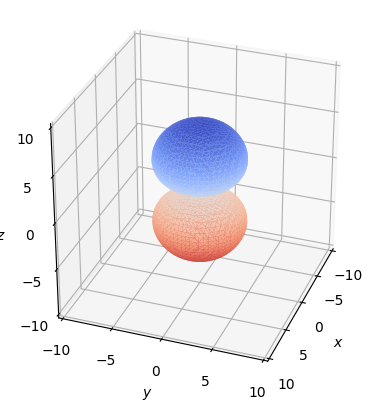

In [33]:
# 方法一：ax.plot_trisurf 
fig, ax = new_fig_and_ax() 
iso_surface = ax.plot_trisurf( 
                              verts[:, 0], verts[:, 1], faces, verts[:, 2], 
                              lw=0, # 线宽设置为0 
                              cmap="coolwarm_r", # 可以带上颜色让图像更好看，但是注意这个颜色与波函数的物理意义无关 
                              ) 

# 展示结果 
plt.show() 

# 或者使用plt.savefig(...)把图像存储到文件中 
# plt.savefig("orbital_plot.png", 
#             transparent=True, 
#             bbox_inches='tight', 
#             dpi=600, 
#             )

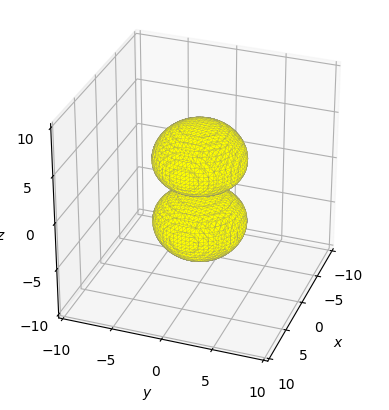

In [34]:
# 方法二：Poly3DCollection 
fig, ax = new_fig_and_ax() 
mesh = Poly3DCollection(verts[faces], lw=0.1) # 线宽0.1 
mesh.set_facecolor("yellow") # 黄色的表面 
mesh.set_edgecolor("grey") # 灰色的边线
ax.add_collection3d(mesh) # 直接加入ax中 
plt.show()

In [35]:
# 方法三: 写入obj文件 
filename = "isosurface.obj" 
with open(filename, "w") as f: 
    # (1) o开头的行：写入对象名称，可以自行指定 
    f.write(f"o Isosurface-2pz {iso_value}\n") 
    
    # (2) v开头的行：写入顶点坐标(x, y, z) 
    for vert_coords in verts: 
        x, y, z = vert_coords 
    f.write("v %s %s %s \n" % (x, y, z)) 
    
    # (3) f开头的行：写入三角面的顶点编号(id_1, id_2, id_3)，注意编号从1开始计 
    for vert_ids in faces: 
        id_1, id_2, id_3 = vert_ids + 1 
        f.write("f %s %s %s \n" % (id_1, id_2, id_3))

In [36]:
# obj文件内容 
with open(filename, "r") as f: 
    lines = f.readlines() 

print(f"{len(lines) = }\n") 
print("".join(lines[:5]), "...") 
print("".join(lines[-5:]))

len(lines) = 7802

o Isosurface-2pz 0.0004
v 1.4285714285714288 4.294044338926977 3.4693877551020407 
f 3 2 1 
f 1 4 3 
f 7 6 5 
 ...
f 3825 3902 3805 
f 3903 3831 3811 
f 3831 3903 3814 
f 3904 3837 3823 
f 3837 3904 3826 



In [37]:
# 2px轨道波函数 
psi_2px = lambda r, theta, phi: \
                (-1) * 1 / np.sqrt(2) * hydrogen_wave_function(2, 1, 1)(r, theta, phi) + \
                1 / np.sqrt(2) * hydrogen_wave_function(2, 1, -1)(r, theta, phi) 

# 2py轨道波函数 
psi_2py = lambda r, theta, phi: \
                1j / np.sqrt(2) * hydrogen_wave_function(2, 1, 1)(r, theta, phi) + \
                1j / np.sqrt(2) * hydrogen_wave_function(2, 1, -1)(r, theta, phi) 

#（思考：这里同时用到了两个波函数，并且计算的结果仍旧是复数，是否有更简洁&更适当的写法？） 
#（提示：使用z.real或者z.imag获取复数z的实部或虚部）

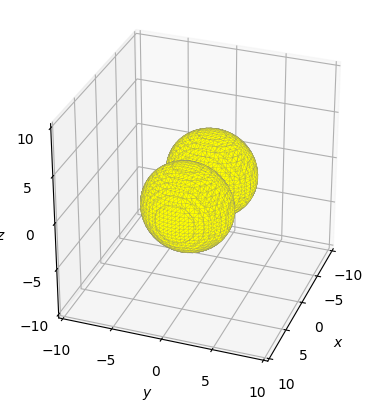

In [38]:
# 找到等值面
iso_value = 4e-4 
psi_2px_values = psi_2px(R, THETA, PHI) 
prob_dens_2px = np.abs(psi_2px_values)**2 
# 2px轨道概率密度 
verts_2px, faces_2px, _, _ = marching_cubes( prob_dens_2px, level=iso_value, spacing = (step, step, step), ) 
verts_2px -= limit 
verts_2px[:, [0, 1]] = verts_2px[:, [1, 0]] 
# 绘制等值面 
fig, ax = new_fig_and_ax() 
mesh_2px = Poly3DCollection(verts_2px[faces_2px], lw=0.1) # 线宽0.1 
mesh_2px.set_facecolor("yellow") # 黄色的表面 
mesh_2px.set_edgecolor("grey") # 灰色的边线 
ax.add_collection3d(mesh_2px) # 直接加入ax中 
plt.show()

In [40]:
# 2s轨道 
psi_2s = hydrogen_wave_function(2, 0, 0) 

# 2px, 2py轨道定义同上，只是这里换一种简洁的写法 
psi_2px = lambda r, theta, phi: \
                (-1) * np.sqrt(2) * hydrogen_wave_function(2, 1, 1)(r, theta, phi).real 
psi_2py = lambda r, theta, phi: \
                (-1) * np.sqrt(2) * hydrogen_wave_function(2, 1, 1)(r, theta, phi).imag 

# 2pz轨道是最开始介绍的2p0轨道 
psi_2pz = hydrogen_wave_function(2, 1, 0)

# 上述杂化轨道sp3,c的定义 
psi_sp3_c = lambda r, theta, phi: \
                1 / 2 * psi_2s(r, theta, phi) - \
                1 / 2 * psi_2px(r, theta, phi) + \
                1 / 2 * psi_2py(r, theta, phi) - \
                1 / 2 * psi_2pz(r, theta, phi)

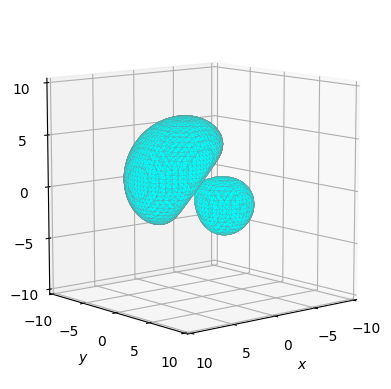

In [41]:
# 找到等值面 
iso_value = 4e-4 
psi_sp3_c_values = psi_sp3_c(R, THETA, PHI) 
prob_dens_sp3_c = np.abs(psi_sp3_c_values)**2 
verts_sp3_c, faces_sp3_c, _, _ = marching_cubes( prob_dens_sp3_c, level=iso_value, spacing = (step, step, step), ) 
verts_sp3_c -= limit 
verts_sp3_c[:, [0, 1]] = verts_sp3_c[:, [1, 0]] 
# 绘制等值面 
fig, ax = new_fig_and_ax() 
mesh_sp3_c = Poly3DCollection(verts_sp3_c[faces_sp3_c], lw=0.1) 
mesh_sp3_c.set_facecolor("cyan") 
mesh_sp3_c.set_edgecolor("grey") 
ax.add_collection3d(mesh_sp3_c) 
ax.view_init(elev=10, azim=50) 
# 适当调整视角 
plt.show()